# Imports

##### General imports

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")

In [2]:
import networkx as nx
import pandas as pd

##### Import from flatland environment 

In [3]:
from flatland.envs.rail_env import RailEnv
from flatland.envs.observations import *
from flatland.envs.rail_generators import complex_rail_generator,rail_from_manual_specifications_generator,random_rail_generator, RailGenerator
from flatland.envs.schedule_generators import complex_schedule_generator, random_schedule_generator, ScheduleGenerator
from flatland.utils.rendertools import RenderTool

##### Import from our framework

In [4]:
from src.graph import NetworkGraph
from src.flows import TimeNetwork
from src.flows import MCFlow

# Test of time expanded network

##### Create a flatland network

In [5]:
number_agents = 10

size_side = 7
env = RailEnv(width=size_side,
              height=size_side,
              rail_generator=complex_rail_generator(nr_start_goal=20, nr_extra=1, 
                                                    min_dist=6, max_dist=99999, 
                                                    seed = np.random.randint(0,2000)),
              schedule_generator=complex_schedule_generator(),
              number_of_agents=number_agents,
              obs_builder_object=GlobalObsForRailEnv())

env.reset()

env_renderer = RenderTool(env)
env_renderer.render_env(show=True, show_predictions=False, show_observations=False)


matrix_rail = np.array(env.rail.grid.tolist())
flatlandNetwork = NetworkGraph(matrix_rail,[(0,1)],[(1,0)])

In [6]:
sources = []
sinks = []
for agent in env.agents:
    sources.append(agent.initial_position)
    sinks.append(agent.target)

##### create a time expanded network

In [7]:
import time

/home/charles/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/charles/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


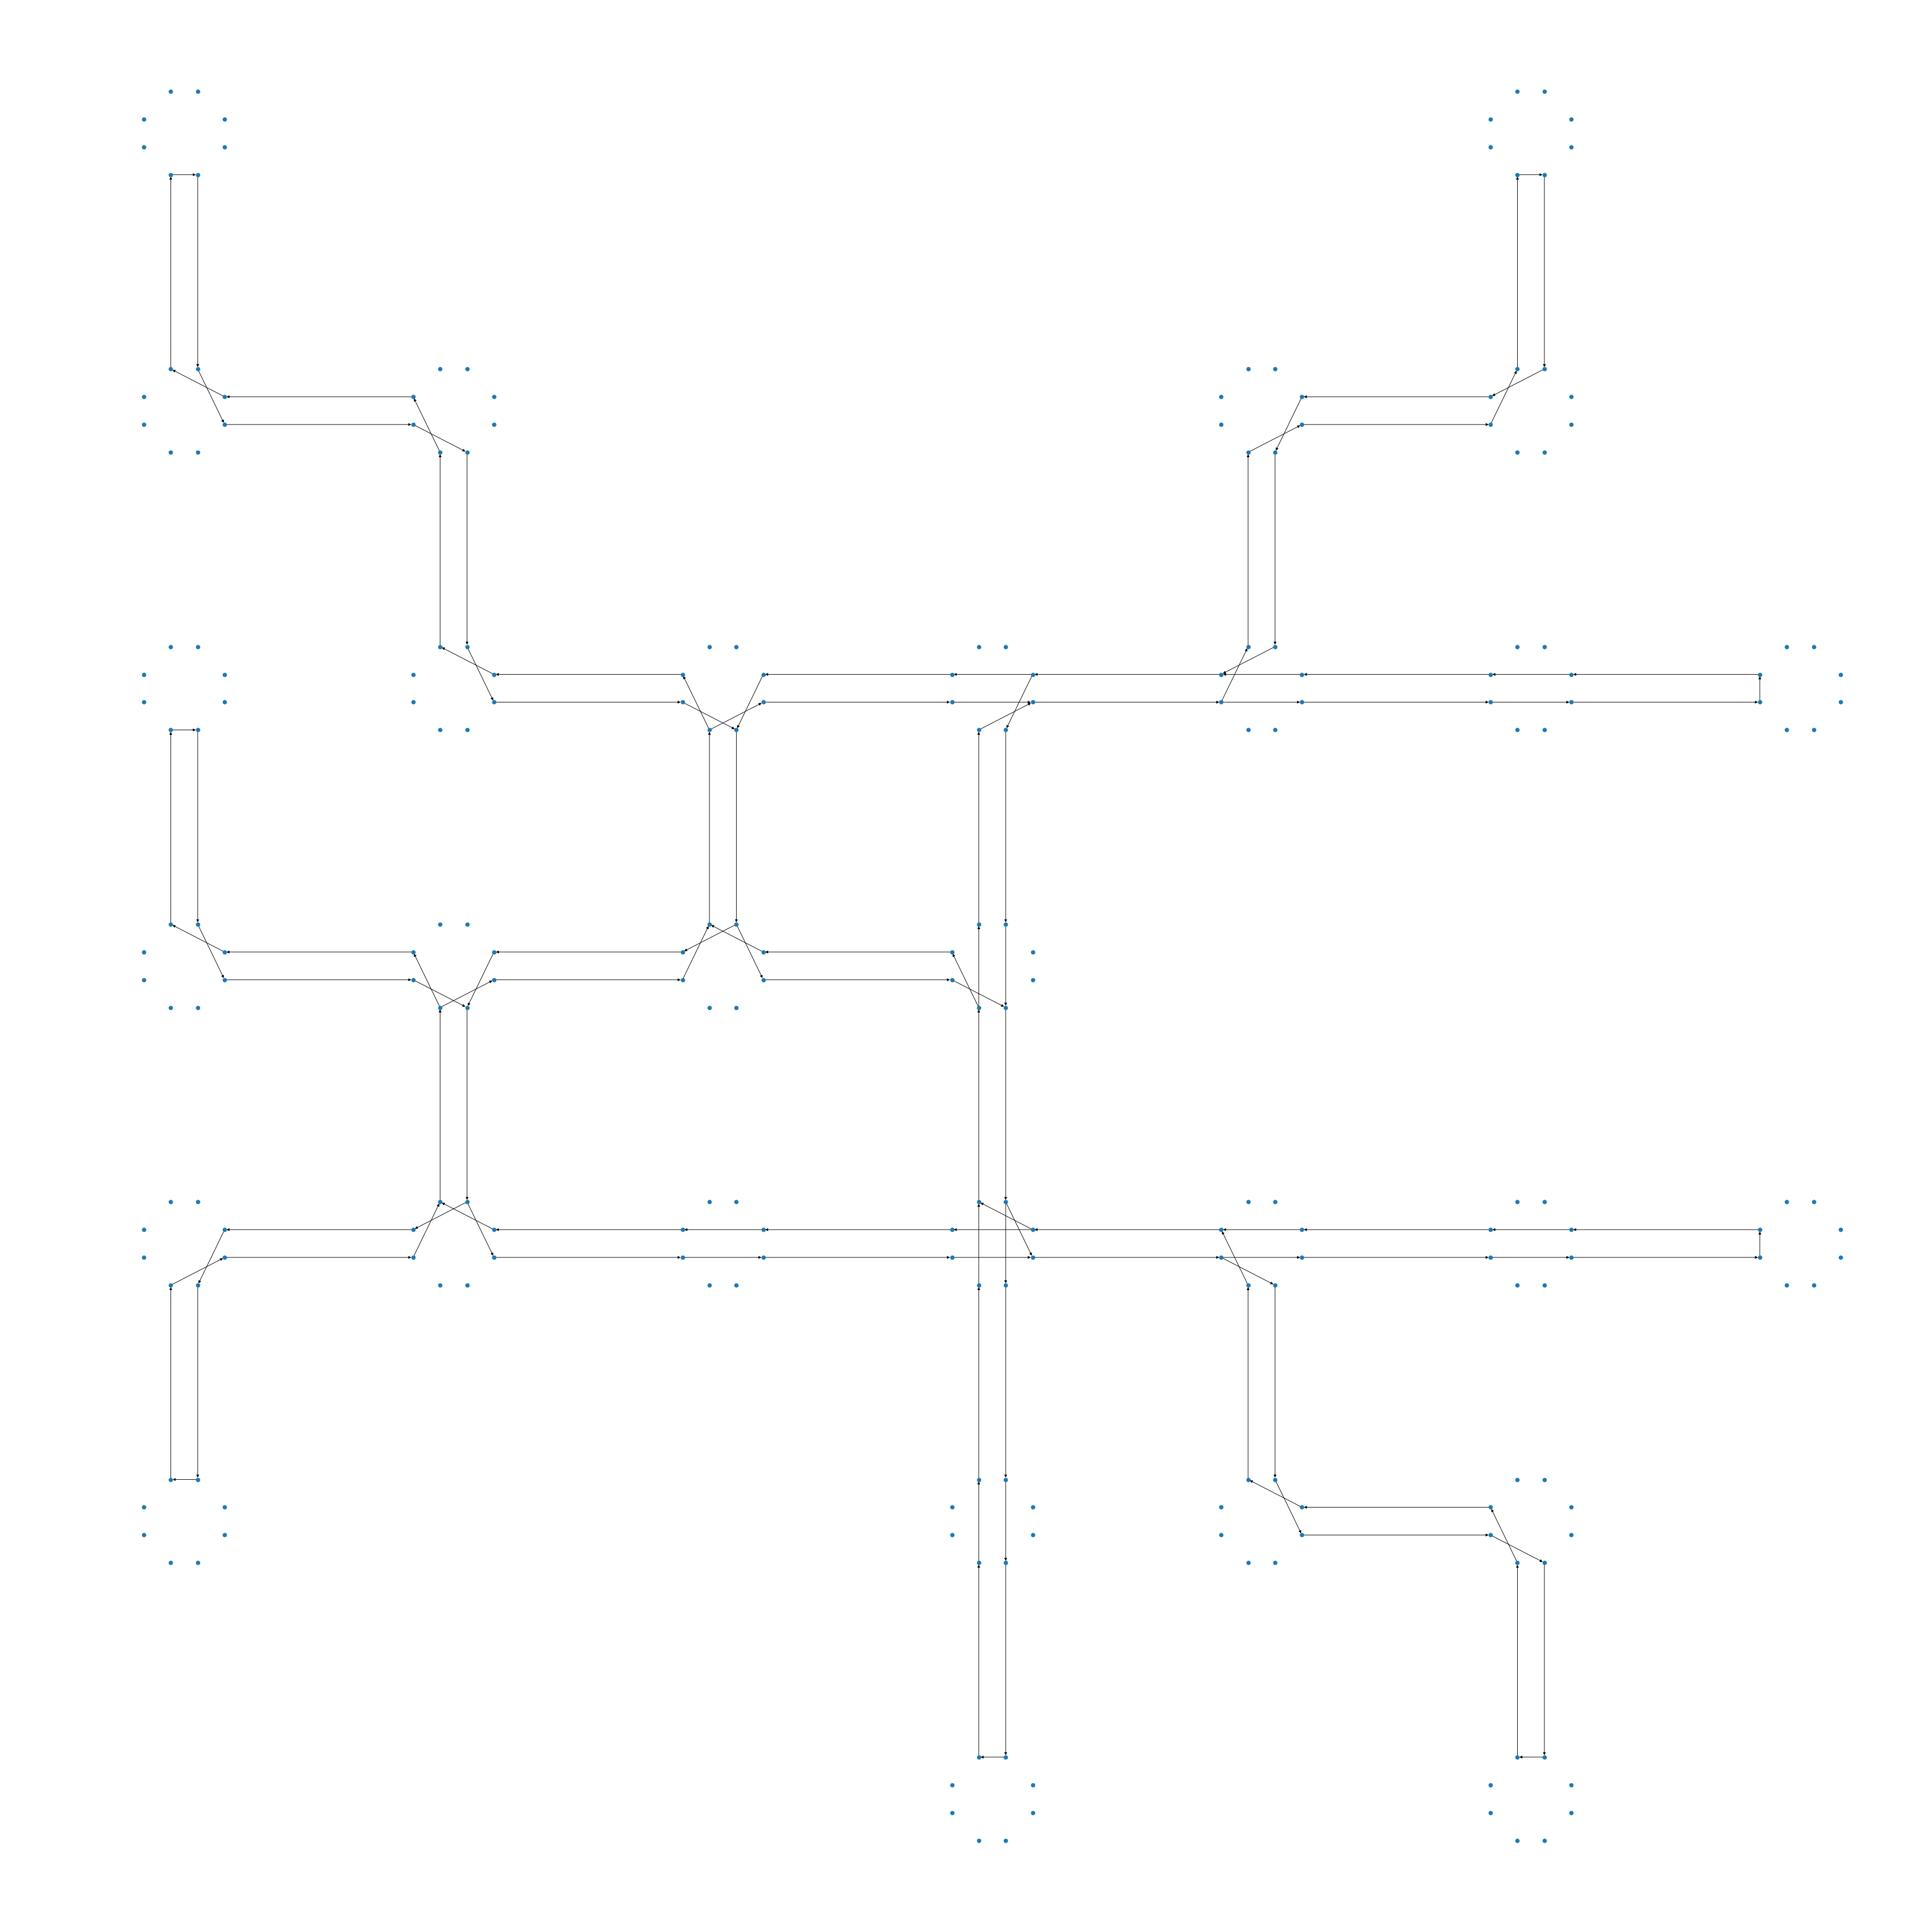

In [8]:
flatlandNetwork.show()

In [9]:
start = time.time()
TestNetworkTime = TimeNetwork(flatlandNetwork, depth=50)
stop = time.time()
print(f'time taken to build the graph: {stop-start}')

time taken to build the graph: 0.3182487487792969


In [10]:
TestNetworkTime.connect_sources_and_sink(sources,sinks)

In [20]:
TestNetworkTime.topology

[{('(0, 0)_S_in_t0', '(0, 0)_S_out_t0')},
 {('(0, 5)_S_in_t0', '(0, 5)_S_out_t0')},
 {('(1, 0)_E_in_t0', '(1, 0)_N_out_t0'),
  ('(1, 0)_N_in_t0', '(1, 0)_E_out_t0')},
 {('(1, 1)_S_in_t0', '(1, 1)_W_out_t0'),
  ('(1, 1)_W_in_t0', '(1, 1)_S_out_t0')},
 {('(1, 4)_E_in_t0', '(1, 4)_S_out_t0'),
  ('(1, 4)_S_in_t0', '(1, 4)_E_out_t0')},
 {('(1, 5)_N_in_t0', '(1, 5)_W_out_t0'),
  ('(1, 5)_W_in_t0', '(1, 5)_N_out_t0')},
 {('(2, 0)_S_in_t0', '(2, 0)_S_out_t0')},
 {('(2, 1)_E_in_t0', '(2, 1)_N_out_t0'),
  ('(2, 1)_N_in_t0', '(2, 1)_E_out_t0')},
 {('(2, 2)_E_in_t0', '(2, 2)_S_out_t0'),
  ('(2, 2)_S_in_t0', '(2, 2)_E_out_t0'),
  ('(2, 2)_S_in_t0', '(2, 2)_W_out_t0'),
  ('(2, 2)_W_in_t0', '(2, 2)_S_out_t0')},
 {('(2, 3)_E_in_t0', '(2, 3)_S_out_t0'),
  ('(2, 3)_E_in_t0', '(2, 3)_W_out_t0'),
  ('(2, 3)_S_in_t0', '(2, 3)_E_out_t0'),
  ('(2, 3)_W_in_t0', '(2, 3)_E_out_t0')},
 {('(2, 4)_E_in_t0', '(2, 4)_W_out_t0'),
  ('(2, 4)_N_in_t0', '(2, 4)_W_out_t0'),
  ('(2, 4)_W_in_t0', '(2, 4)_E_out_t0'),
  ('(2

##### Test LP Formulation

test a simple graph

In [12]:
mcflow = MCFlow(TestNetworkTime.graph,len(sources),TestNetworkTime.topology)

Academic license - for non-commercial use only


In [13]:
mcflow.solve()

Optimize a model with 42156 rows, 52336 columns and 157008 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 37231 rows and 45034 columns
Presolve time: 0.17s
Presolved: 4925 rows, 7302 columns, 19078 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.725e+04
 Factor NZ  : 1.670e+05 (roughly 6 MBytes of memory)
 Factor Ops : 1.320e+07 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.42564939e+05 -1.04687143e+05  9.26e+02 5.00e+00  4.06e+02     0s
   1   4.91292545e+04 -1.33690698e+05  3.20e+02 1.30e+00  1.44e+02     0s

Barrier performed 1 iterations in 0.29 seconds
Barrier solve interrupted - model solved by another algo

ValueError: collisions detected

In [14]:
paths = mcflow.get_paths_solution()

In [15]:
mcflow.check_no_collisions_solution(mcflow.solution_complete)

True

In [16]:
for agent, path in paths.items():
    print(f"path for agent {agent}")
    print(path)

path for agent 0
['(2, 5)', '(2, 5)', '(2, 4)', '(2, 3)', '(2, 2)', '(3, 2)', '(3, 1)', '(4, 1)', '(4, 0)', '(5, 0)']
path for agent 1
['(5, 3)', '(4, 3)', '(3, 3)', '(2, 3)', '(2, 4)', '(1, 4)', '(1, 5)', '(0, 5)']
path for agent 2
['(0, 0)', '(1, 0)', '(1, 1)', '(2, 1)', '(2, 2)', '(3, 2)', '(3, 3)', '(4, 3)', '(4, 4)', '(5, 4)', '(5, 5)', '(6, 5)']
path for agent 3
['(4, 5)', '(4, 4)', '(4, 3)', '(4, 2)', '(4, 1)', '(3, 1)', '(3, 0)', '(2, 0)']


In [ ]:
lengths = []
pathsToAllongate = mcflow.solution
for agent,path in pathsToAllongate.items():
    lengths.append(len(path))
    
maxLength = max(lengths)
for agent,path in pathsToAllongate.items():
    for i in range(maxLength-len(path)):
        path.append(None)
    pathsToAllongate[agent] = path

In [ ]:
dfPaths = pd.DataFrame(paths)

In [ ]:
dfPaths